In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Basic Info

In [19]:
train_df = pd.read_csv("option_train.csv")

In [20]:
train_df.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420,0.341270,0.03013,Under
1,0.125000,427.015526,465,0.166667,0.03126,Over
2,20.691244,427.762336,415,0.265873,0.03116,Under
3,1.035002,451.711658,460,0.063492,0.02972,Over
4,39.553020,446.718974,410,0.166667,0.02962,Under


In [21]:
train_df.shape

(1680, 6)

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1680 non-null   float64
 1   S       1680 non-null   float64
 2   K       1680 non-null   int64  
 3   tau     1680 non-null   float64
 4   r       1680 non-null   float64
 5   BS      1680 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 78.9+ KB


In [23]:
test_df = pd.read_csv("option_test_wolabel.csv")

In [24]:
test_df.head()

,S,K,tau,r
0,431.618600,460,0.293651,0.03147
1,432.633296,420,0.182540,0.03147
2,432.633296,430,0.182540,0.03147
3,431.618600,415,0.293651,0.03147
4,434.772855,420,0.043651,0.03147


In [25]:
test_df.shape

(1120, 4)

In [26]:
print(f"Number of Nulls in train: {train_df.isnull().sum().sum()}")
print(f"Number of Nulls in test: {test_df.isnull().sum().sum()}")

Number of Nulls in train: 0
Number of Nulls in test: 0


## Univariate EDA

In [28]:
# BS

train_df["BS"].value_counts()

Under    946
Over     734
Name: BS, dtype: int64

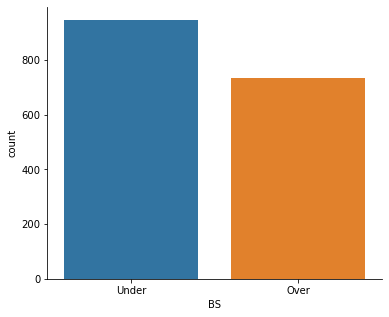

In [33]:
fig, ax = plt.subplots(figsize=(6,5))

sns.countplot(data=train_df, x="BS", ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

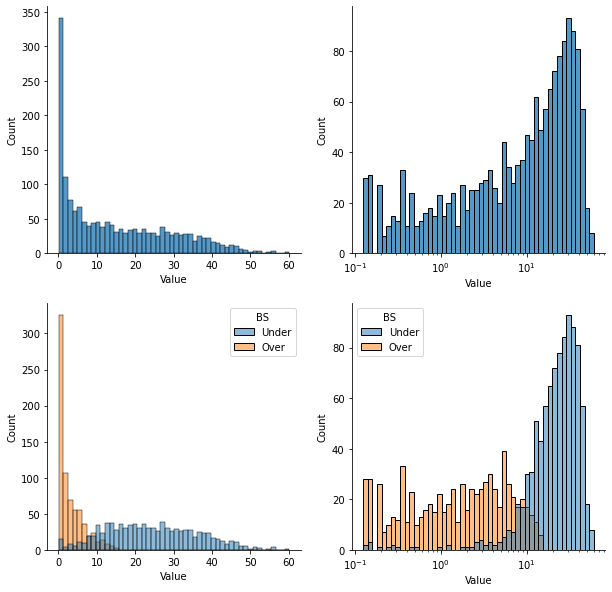

In [30]:
# Value

fig, ax = plt.subplots(2, 2, figsize=(10,10))

sns.histplot(data=train_df, x="Value", ax=ax[0,0], bins=50)
sns.histplot(data=train_df, x="Value", ax=ax[0,1], bins=50, log_scale=True)

sns.histplot(data=train_df, x="Value", ax=ax[1,0], hue="BS", bins=50)
sns.histplot(data=train_df, x="Value", ax=ax[1,1], hue="BS", bins=50, log_scale=True)

for i in range(2):
    for j in range(2):
        ax[i,j].spines["top"].set_visible(False)
        ax[i,j].spines["right"].set_visible(False)


plt.show()

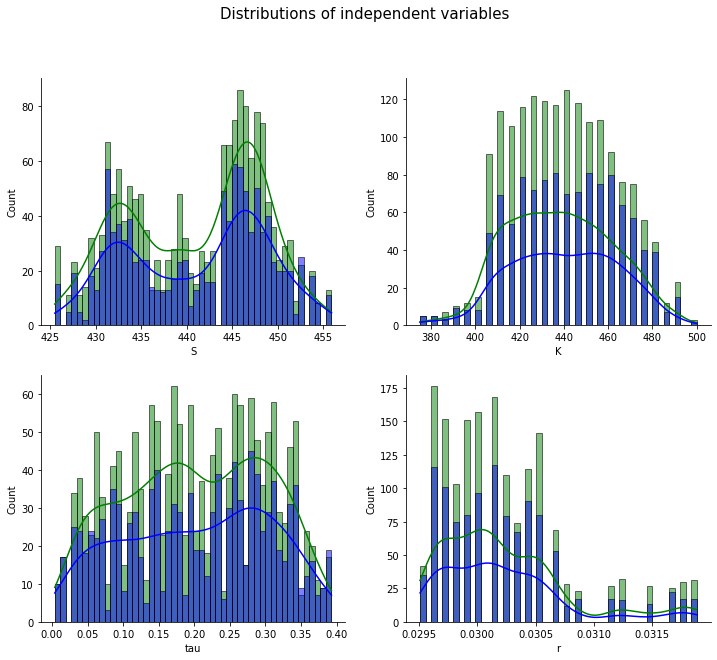

In [16]:
# Indepent Variables - Also check compare distribution train vs test

fig, ax = plt.subplots(2, 2, figsize=(12,10))

c = 0
for i in range(2):
    for j in range(2):
        col = test_df.columns[c]
        sns.histplot(data=train_df, x=col, ax=ax[i,j], bins=50, color="green", kde=True)
        sns.histplot(data=test_df, x=col, ax=ax[i,j], bins=50, color="blue", kde=True)
        c += 1

#         ax[i,j].set_title[f"Distribution of {col}"]
        ax[i,j].spines["top"].set_visible(False)
        ax[i,j].spines["right"].set_visible(False)

fig.suptitle("Distributions of independent variables", fontsize=15)
        
# plt.legend()
plt.show()

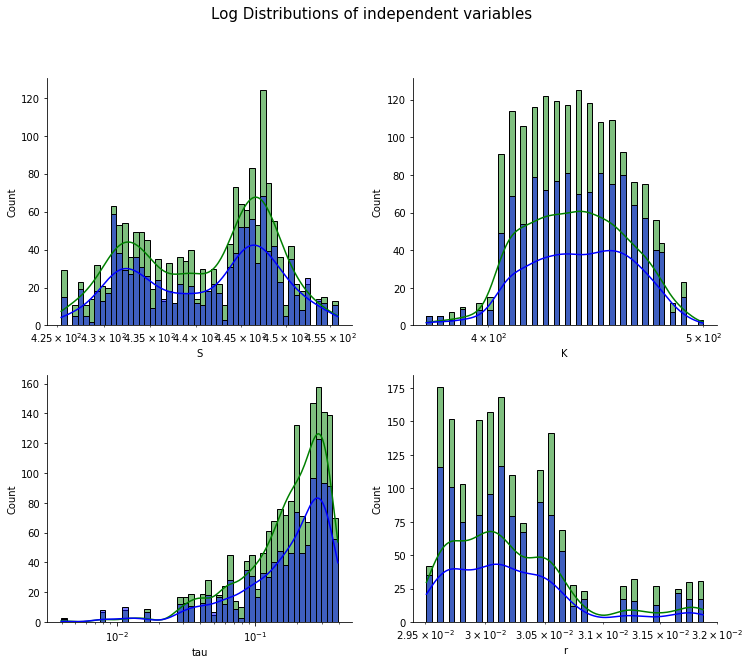

In [17]:
# Indepent Variables - Also check compare distribution train vs test

fig, ax = plt.subplots(2, 2, figsize=(12,10))

c = 0
for i in range(2):
    for j in range(2):
        col = test_df.columns[c]
        sns.histplot(data=train_df, x=col, ax=ax[i,j], bins=50, color="green", log_scale=True, kde=True)
        sns.histplot(data=test_df, x=col, ax=ax[i,j], bins=50, color="blue", log_scale=True, kde=True)
        c += 1

#         ax[i,j].set_title[f"Distribution of log of {col}"]
        ax[i,j].spines["top"].set_visible(False)
        ax[i,j].spines["right"].set_visible(False)

fig.suptitle("Log Distributions of independent variables", fontsize=15)
        
# plt.legend()
plt.show()

## Bivariate EDA

In [54]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

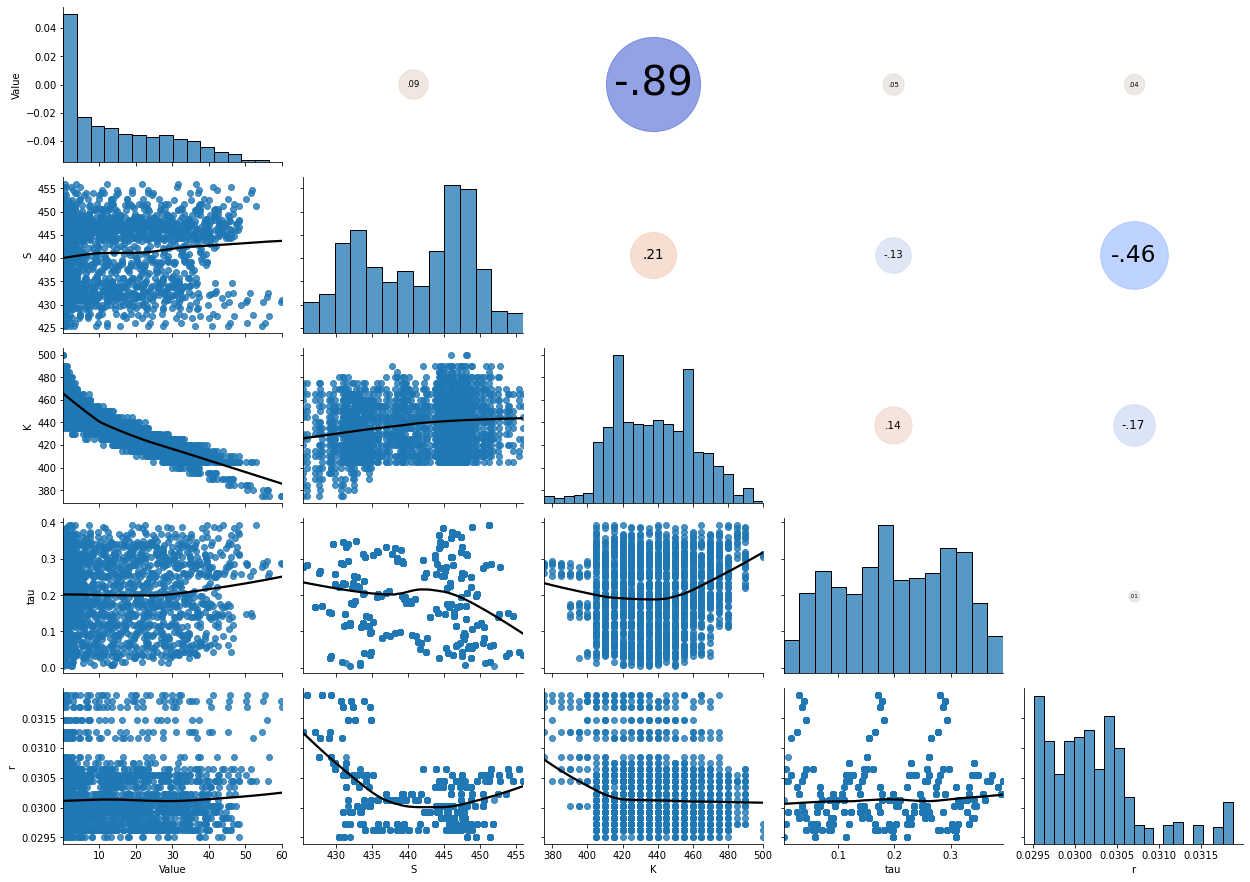

In [58]:
g = sns.PairGrid(train_df, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
# g.map_lower(sns.scatterplot, line_kws={'color': 'black'})
g.map_diag(sns.histplot)
g.map_upper(corrdot);

## Multivaraite EDA

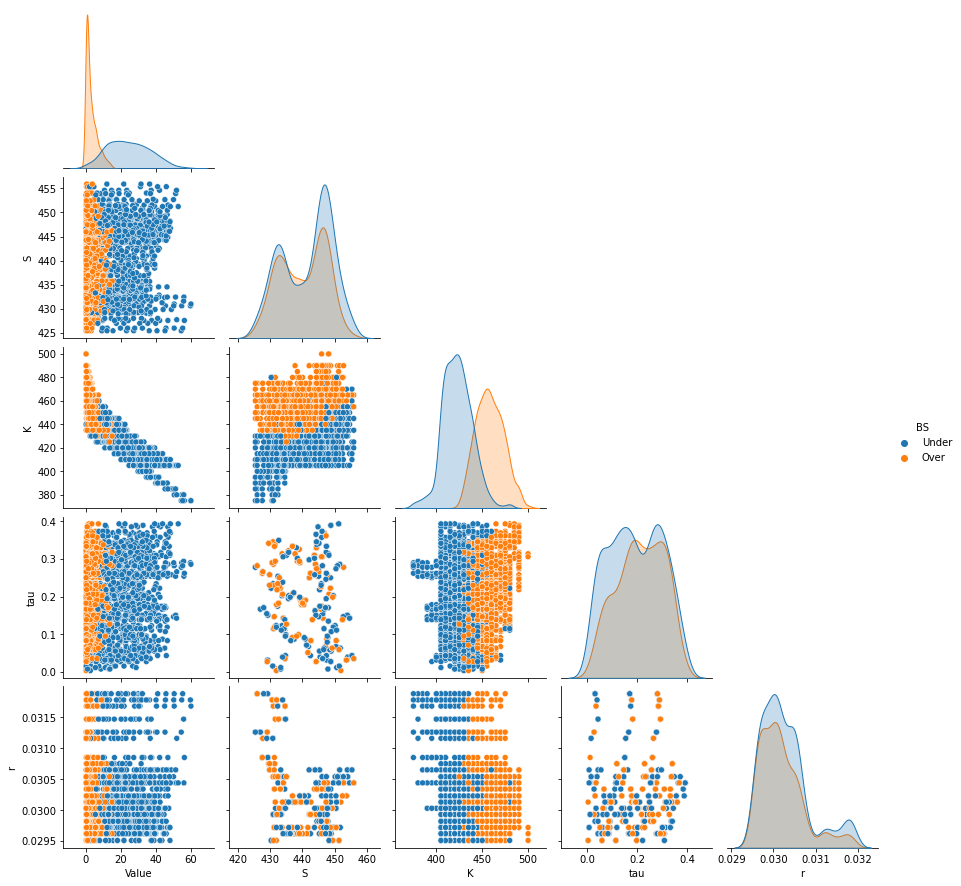

In [63]:
sns.pairplot(train_df, hue="BS", corner=True);